In [ ]:
pip install ipympl

   ---------------------------------------- 0.0/516.3 kB ? eta -:--:--
   --------------- ------------------------ 194.6/516.3 kB 5.8 MB/s eta 0:00:01
   ---------------------------------------  512.0/516.3 kB 6.4 MB/s eta 0:00:01
   ---------------------------------------- 516.3/516.3 kB 5.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/139.4 kB ? eta -:--:--
   ---------------------------------------- 139.4/139.4 kB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/214.4 kB ? eta -:--:--
   --------------------------------------- 214.4/214.4 kB 13.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.3 MB 18.6 MB/s eta 0:00:01
   -------------- ------------------------- 0.8/2.3 MB 12.8 MB/s eta 0:00:01
   ------------------------ --------------- 1.4/2.3 MB 12.9 MB/s eta 0:00:01
   ------------------------------- -------- 1.9/2.3 MB 13.1 MB/s eta 0:00:01
   -------


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\varud\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


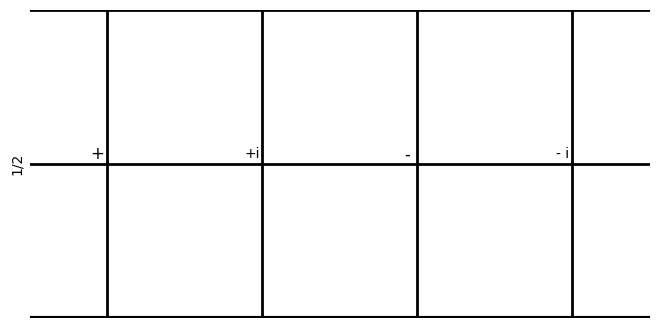

C:\Users\varud\AppData\Local\Temp\ipykernel_23336\1167953082.py:121: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x1, y1)


C:\Users\varud\AppData\Local\Temp\ipykernel_23336\1167953082.py:121: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x1, y1)


C:\Users\varud\AppData\Local\Temp\ipykernel_23336\1167953082.py:191: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(new_x, y)


In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import display, HTML
import ipywidgets as widgets

# Create a figure and an axis with a smaller size
fig, ax = plt.subplots(figsize=(8, 4))

# Set the limits for the x and y axes
ax.set_xlim(0, 16)
ax.set_ylim(0, 8)

# Add grid
ax.grid(False)

# Add labels and a title
ax.set_ylabel('1/2')
ax.set_title('')

# Remove the spines
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')

# Add custom vertical and horizontal lines
ax.axvline(x=2, color='black', linewidth=2)
ax.axvline(x=6, color='black', linewidth=2)
ax.axvline(x=10, color='black', linewidth=2)
ax.axvline(x=14, color='black', linewidth=2)
ax.axhline(y=0, color='black', linewidth=3)
ax.axhline(y=4, color='black', linewidth=2)
ax.axhline(y=8, color='black', linewidth=2)

# Remove tick labels
ax.set_xticks([])
ax.set_yticks([])
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add custom labels
ax.text(1.75, 4.25, '+', fontsize=12, ha='center', va='center')
ax.text(5.75, 4.25, '+i', fontsize=10, ha='center', va='center')
ax.text(9.75, 4.25, '-', fontsize=12, ha='center', va='center')
ax.text(13.75, 4.25, '- i', fontsize=10, ha='center', va='center')

# Function to create and initialize a line
def create_line(start_pos, end_pos, center, color):
    line, = ax.plot([], [], color=color)
    return line, (start_pos, end_pos, center)

def create_point(position, color):
    point, = ax.plot([], [], 'o', color=color)
    return point, position

# Initial points
points = [
    create_point((2, 8), 'y'),
]

# Create lines with different colors
lines = [
    create_line((2, 0), (2, 8), (2, 4), 'r'),
    create_line((0, 4), (6, 4), (2, 4), 'r'),
    create_line((6, 4), (14, 4), (10, 4), 'r'),
    create_line((10, 0), (10, 8), (10, 4), 'r')
]

# Create lines with different colors
lines_y = [
    create_line((6, 0), (6, 8), (6, 4), 'b'),
    create_line((2, 4), (10, 4), (6, 4), 'b'),
    create_line((10, 4), (16, 4), (14, 4), 'b'),
    create_line((14, 0), (14, 8), (14, 4), 'b')
]

# Extract lines and centers
line_objects = [line[0] for line in lines]
centers = [line[1] for line in lines]

# Extract lines and centers
line_objects_y = [line[0] for line in lines_y]
centers_y = [line[1] for line in lines_y]

# Extract points
point_objects = [point[0] for point in points]
point_positions = [point[1] for point in points]

# Initialize the lines and points
def init():
    for line in line_objects:
        line.set_data([], [])
    for point in point_objects:
        point.set_data([], [])
    return line_objects + point_objects

# Update function for the animation
def update_Pauli_X_Y(frame, line_objects, centers, point_objects, point_position, rotation_angle, pauli_y):
    angle = np.deg2rad(rotation_angle * frame / 100)
    cos_angle = np.cos(angle)
    sin_angle = np.sin(angle)

    for line, (start_pos, end_pos, center) in zip(line_objects, centers):
        # Rotate the line around the center
        x0, y0 = center
        x1 = x0 + cos_angle * (start_pos[0] - x0) - sin_angle * (start_pos[1] - y0)
        y1 = y0 + sin_angle * (start_pos[0] - x0) + cos_angle * (start_pos[1] - y0)
        x2 = x0 + cos_angle * (end_pos[0] - x0) - sin_angle * (end_pos[1] - y0)
        y2 = y0 + sin_angle * (end_pos[0] - x0) + cos_angle * (end_pos[1] - y0)
        line.set_data([x1, x2], [y1, y2])

    new_positions = []
    for point, position in zip(point_objects, point_position):
        if pauli_y:
            x0, y0 = (6, 4)
        else:
            x0, y0 = (2, 4)  # Rotation center for points
        x1 = x0 + cos_angle * (position[0] - x0) - sin_angle * (position[1] - y0)
        y1 = y0 + sin_angle * (position[0] - x0) + cos_angle * (position[1] - y0)
        point.set_data(x1, y1)
        new_positions.append((x1, y1))  # Update the position

    # Update the global positions
    global point_positions
    point_positions = new_positions

    return line_objects + point_objects

def update_P(frame, line_objects, centers, point_objects, point_position, rotation_angle, pauli_y, new_line):
    new_positions = []
    if new_line:
        for point, position in zip(point_objects, point_position):
            x, y = position
            new_x = x + 2 * frame / 100
            new_line.set_data([x, new_x], [y, y])
            point.set_data(new_x, y)
            new_positions.append((new_x, y))
    global point_positions
    point_positions = new_positions

    # Remove the new line after animation
    if frame == 100:
        new_line.remove()

    return line_objects + point_objects

def update_T(frame, line_objects, centers, point_objects, point_position, rotation_angle, pauli_y, new_line):
    new_positions = []
    if new_line:
        for point, position in zip(point_objects, point_position):
            x, y = position
            new_x = x + 1 * frame / 100
            new_line.set_data([x, new_x], [y, y])
            point.set_data(new_x, y)
            new_positions.append((new_x, y))
    global point_positions
    point_positions = new_positions

    # Remove the new line after animation
    if frame == 100:
        new_line.remove()

    return line_objects + point_objects

def update_S(frame, line_objects, centers, point_objects, point_position, rotation_angle, pauli_y, new_line):
    new_positions = []
    if new_line:
        for point, position in zip(point_objects, point_position):
            x, y = position
            new_x = x + 4 * frame / 100
            new_line.set_data([x, new_x], [y, y])
            point.set_data(new_x, y)
            new_positions.append((new_x, y))
    global point_positions
    point_positions = new_positions

    # Remove the new line after animation
    if frame == 100:
        new_line.remove()

    return line_objects + point_objects

def update_Pauli_Z(frame, line_objects, centers, point_objects, point_position, rotation_angle, pauli_y, new_line):
    new_positions = []
    if new_line:
        for point, position in zip(point_objects, point_position):
            x, y = position
            new_x = x + 8 * frame / 100
            new_line.set_data([x, new_x], [y, y])
            point.set_data(new_x, y)
            new_positions.append((new_x, y))
    global point_positions
    point_positions = new_positions

    # Remove the new line after animation
    if frame == 100:
        new_line.remove()

    return line_objects + point_objects

# Global variable to store the animation
ani = None

# Function to create a new green line and animate it
def S_90(change):
    global ani
    new_line, = ax.plot([], [], color='g', linewidth=2)
    if ani:
        ani.event_source.stop()
    ani = animation.FuncAnimation(fig, update_S, frames=np.arange(0, 101, 5), init_func=init, fargs=(line_objects, centers, point_objects, point_positions, 0, False, new_line), blit=True)
    display(HTML(ani.to_jshtml()))

def P_45(change):
    global ani
    new_line, = ax.plot([], [], color='g', linewidth=2)
    if ani:
        ani.event_source.stop()
    ani = animation.FuncAnimation(fig, update_P, frames=np.arange(0, 101, 5), init_func=init, fargs=(line_objects, centers, point_objects, point_positions, 0, False, new_line), blit=True)
    display(HTML(ani.to_jshtml()))

def T_22(change):
    global ani
    new_line, = ax.plot([], [], color='g', linewidth=2)
    if ani:
        ani.event_source.stop()
    ani = animation.FuncAnimation(fig, update_T, frames=np.arange(0, 101, 5), init_func=init, fargs=(line_objects, centers, point_objects, point_positions, 0, False, new_line), blit=True)
    display(HTML(ani.to_jshtml()))

def Pauli_Z_180(change):
    global ani
    new_line, = ax.plot([], [], color='g', linewidth=2)
    if ani:
        ani.event_source.stop()
    ani = animation.FuncAnimation(fig, update_Pauli_Z, frames=np.arange(0, 101, 5), init_func=init, fargs=(line_objects, centers, point_objects, point_positions, 0,False, new_line), blit=True)
    display(HTML(ani.to_jshtml()))

# Function to rotate by 180 degrees
def Pauli_X_180(change):
    global ani
    if ani:
        ani.event_source.stop()
    ani = animation.FuncAnimation(fig, update_Pauli_X_Y, frames=np.arange(0, 101, 5), init_func=init, fargs=(line_objects, centers, point_objects, point_positions, 180, False), blit=True)
    display(HTML(ani.to_jshtml()))

def Pauli_Y_180(change):
    global ani
    if ani:
        ani.event_source.stop()
    ani = animation.FuncAnimation(fig, update_Pauli_X_Y, frames=np.arange(0, 101, 5), init_func=init, fargs=(line_objects_y, centers_y, point_objects, point_positions, 180, True), blit=True)
    display(HTML(ani.to_jshtml()))

def H_270(change):
    global ani
    if ani:
        ani.event_source.stop()
    ani = animation.FuncAnimation(fig, update_Pauli_X_Y, frames=np.arange(0, 101, 5), init_func=init, fargs=(line_objects, centers, point_objects, point_positions, 180, False), blit=True)
    display(HTML(ani.to_jshtml()))

# Create buttons and on click event
rotate_button_x = widgets.Button(description="Pauli X Gate")
rotate_button_x.on_click(Pauli_X_180)

rotate_button_y = widgets.Button(description="Pauli Y Gate")
rotate_button_y.on_click(Pauli_Y_180)

rotate_button_z = widgets.Button(description="Pauli Z Gate")
rotate_button_z.on_click(Pauli_Z_180)

rotate_button_s = widgets.Button(description="S Gate")
rotate_button_s.on_click(S_90)

rotate_button_p = widgets.Button(description="P Gate")
rotate_button_p.on_click(P_45)

rotate_button_t = widgets.Button(description="T Gate")
rotate_button_t.on_click(T_22)

rotate_button_h = widgets.Button(description="Hadamard Gate")
rotate_button_h.on_click(H_270)

button_box = widgets.HBox([rotate_button_x, rotate_button_y, rotate_button_z, rotate_button_s, rotate_button_p, rotate_button_t, rotate_button_h])
display(button_box)

plt.show()

